# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.11.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,#feature scaling to each and every value by diving all value 255 .
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(r"C:\Users\udaya\OneDrive\Desktop\AI & ML Project\lung_infection-CNN\data\train",
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 251 images belonging to 3 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r"C:\Users\udaya\OneDrive\Desktop\AI & ML Project\lung_infection-CNN\data\test",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 66 images belonging to 3 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu',input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#rectifier activation 

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=3, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [13]:
h=cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
8/8 [==============================] - 24s 3s/step - loss: 1.0683 - accuracy: 0.4542 - val_loss: 1.1665 - val_accuracy: 0.3030
Epoch 2/20
8/8 [==============================] - 24s 3s/step - loss: 0.8146 - accuracy: 0.7251 - val_loss: 1.7690 - val_accuracy: 0.0455
Epoch 3/20
8/8 [==============================] - 24s 3s/step - loss: 0.5485 - accuracy: 0.7888 - val_loss: 2.8303 - val_accuracy: 0.2424
Epoch 4/20
8/8 [==============================] - 24s 3s/step - loss: 0.4994 - accuracy: 0.7729 - val_loss: 3.0669 - val_accuracy: 0.2727
Epoch 5/20
8/8 [==============================] - 24s 3s/step - loss: 0.4764 - accuracy: 0.8247 - val_loss: 3.1106 - val_accuracy: 0.1818
Epoch 6/20
8/8 [==============================] - 24s 3s/step - loss: 0.3582 - accuracy: 0.8884 - val_loss: 3.5418 - val_accuracy: 0.3030
Epoch 7/20
8/8 [==============================] - 24s 3s/step - loss: 0.5211 - accuracy: 0.7530 - val_loss: 2.6913 - val_accuracy: 0.0606
Epoch 8/20
8/8 [==================

# Part 4 - Making a single prediction

In [14]:
cnn.save(r'C:\Users\udaya\OneDrive\Desktop\DeepLearning_Udemy\CNN\cat_dog_CNN_model.h5')

In [30]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r"C:\Users\udaya\OneDrive\Desktop\AI & ML Project\lung_infection-CNN\data\test\healthy\0117.jpeg", target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

1/1 [==============================] - 0s 49ms/step


{'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}

In [29]:
# print(np.argmax(result[0]))

0


In [32]:
if np.argmax(result[0])==0:
    print("Healthy")
elif np.argmax(result[0]==1):
    print("Type 1 desease")
else:
    print("Type 2 desease")

Healthy


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

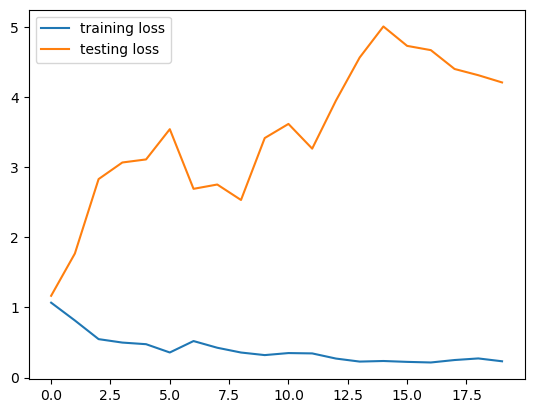

In [35]:
plt.plot(h.history['loss'],label='training loss')
plt.plot(h.history['val_loss'],label='testing loss')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix
pred = np.argmax(cnn.predict(test_set),axis=1)

3/3 [==============================] - 3s 719ms/step


In [ ]:
cm = confusion_matrix(np.argmax(test_set,axis=1),pred)
print(cm)

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.show()